## Desafío - Estimando curvas normales
## Cristian Vidal

## 1. Importe un csv desde internet

<b>Utilice la base de datos de un compañero creada en la sesión pasada.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats

In [2]:
df = pd.read_csv('subsample_AEMG_demo.csv'); # Alfredo Martínez Guerrero
df = df.drop(columns="Unnamed: 0")
df.head(5)

cname  undp_hdi ccodealp    ht_region  gle_cgdpc    imf_pop  ffp_hf  \
0   Grenada     0.751      GRD    Caribbean  8314.5596        NaN     8.4   
1   Bolivia     0.671      BOL        LatAm  4023.8701  10.078000     6.4   
2  Tanzania     0.519      TZA  SubSaharian  1416.3000  43.880001     7.0   
3    Rwanda     0.493      RWA  SubSaharian  1440.3900  10.200000     7.5   
4   Vanuatu     0.598      VUT      Pacific  2877.0100   0.257000     NaN   

    wef_qes  wdi_expedu   wdi_ners  
0       NaN         NaN  82.359642  
1  3.348756     7.28546  76.535461  
2  3.004210     3.47914        NaN  
3  4.037596     3.79746  27.239189  
4       NaN     4.91083  49.496300

In [3]:
df.shape

(97, 10)

## 2. Importe su conjunto de funciones

<b>Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión
pasada e impórtelo</b>

In [4]:
import ancilliary_funcs as funciones_auxiliares

<b>Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de
su compañero.</b>

In [5]:
for columna in df.columns:
    print(columna, funciones_auxiliares.observaciones_perdidas(df, columna))

cname {'cantidad': 0, 'porcentaje': 0.0, 'tipo': dtype('O')}
undp_hdi {'cantidad': 5, 'porcentaje': 0.05, 'tipo': dtype('float64')}
ccodealp {'cantidad': 0, 'porcentaje': 0.0, 'tipo': dtype('O')}
ht_region {'cantidad': 0, 'porcentaje': 0.0, 'tipo': dtype('O')}
gle_cgdpc {'cantidad': 0, 'porcentaje': 0.0, 'tipo': dtype('float64')}
imf_pop {'cantidad': 24, 'porcentaje': 0.25, 'tipo': dtype('float64')}
ffp_hf {'cantidad': 12, 'porcentaje': 0.12, 'tipo': dtype('float64')}
wef_qes {'cantidad': 23, 'porcentaje': 0.24, 'tipo': dtype('float64')}
wdi_expedu {'cantidad': 28, 'porcentaje': 0.29, 'tipo': dtype('float64')}
wdi_ners {'cantidad': 31, 'porcentaje': 0.32, 'tipo': dtype('float64')}


## 3. Estime el puntaje Z

<b>Estime el puntaze Z para las 10 primeras y últimas observaciones de las variables con una menor
cantidad de datos perdidos.</b>

<b>Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje z de una observación utilizando la fórmula.</b>

In [6]:
variables_menor_datos_perdidos = ['gle_cgdpc','undp_hdi','ffp_hf']
for variable in variables_menor_datos_perdidos:
    df[variable + '_z'] = df[variable].apply(lambda x: round((x - df[variable].dropna().mean()) / df[variable].dropna().std(), 2))

In [7]:
df.head(10)

cname  undp_hdi ccodealp      ht_region    gle_cgdpc    imf_pop  ffp_hf  \
0   Grenada     0.751      GRD      Caribbean    8314.5596        NaN     8.4   
1   Bolivia     0.671      BOL          LatAm    4023.8701  10.078000     6.4   
2  Tanzania     0.519      TZA    SubSaharian    1416.3000  43.880001     7.0   
3    Rwanda     0.493      RWA    SubSaharian    1440.3900  10.200000     7.5   
4   Vanuatu     0.598      VUT        Pacific    2877.0100   0.257000     NaN   
5   Belgium     0.895      BEL     WesternDem   33764.7110  11.181000     1.9   
6    Zambia     0.576      ZMB    SubSaharian    1916.7900        NaN     7.8   
7  Cambodia     0.558      KHM  SouthEastAsia    1927.0601  14.605000     7.5   
8     Yemen     0.499      YEM    NorthAfrica    2170.9299        NaN     7.5   
9    Monaco       NaN      MCO     WesternDem  108481.1300        NaN     NaN   

    wef_qes  wdi_expedu   wdi_ners  gle_cgdpc_z  undp_hdi_z  ffp_hf_z  
0       NaN         NaN  82.359642        -0.36        0.32      1.35  
1  3.348756     7.28546  76.535461        -0.56       -0.20      0.36  
2  3.004210     3.47914        NaN        -0.69       -1.20      0.66  
3  4.037596     3.79746  27.239189        -0.68       -1.37      0.91  
4       NaN     4.91083  49.496300        -0.62       -0.68       NaN  
5  5.328891     6.58514  95.285599         0.84        1.27     -1.88  
6  4.328835         NaN        NaN        -0.66       -0.83      1.06  
7  3.176270     1.90197        NaN        -0.66       -0.95      0.91  
8  1.896328         NaN  41.721760        -0.65       -1.33      0.91  
9       NaN     1.02195        NaN         4.37         NaN       NaN

<b>Para ordenar los valores pueden utilzar la función sort_values del DataFrame analizado.</b>

In [8]:
my_sorted_df = df.sort_values(by=variables_menor_datos_perdidos)

<b>Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna . Lean la
documentación asociada al método subset</b>

In [9]:
my_sorted_no_na_df = my_sorted_df.dropna(subset=variables_menor_datos_perdidos)

<b>Seleccionen las primeras y últimas 10 observaciones de la base reordenada.</b>

In [10]:
my_sorted_no_na_df.head(10)

cname  undp_hdi ccodealp    ht_region   gle_cgdpc    imf_pop  \
58    El Salvador     0.678      SLV        LatAm   332.26999        NaN   
42        Liberia     0.427      LBR  SubSaharian   488.26999        NaN   
88          Niger     0.351      NER  SubSaharian   644.53998        NaN   
73  Guinea-Bissau     0.421      GNB  SubSaharian   961.26001        NaN   
81   Sierra Leone     0.431      SLE  SubSaharian   979.95001   6.232000   
41         Guinea     0.414      GIN  SubSaharian   993.83002  11.745000   
74           Mali     0.438      MLI  SubSaharian  1063.26000  14.854000   
62    Afghanistan     0.479      AFG    SouthAsia  1282.64000  29.825001   
60  Cote d'Ivoire     0.466      CIV  SubSaharian  1354.29000  22.524000   
67          Benin     0.481      BEN  SubSaharian  1413.05000  10.320000   

    ffp_hf   wef_qes  wdi_expedu   wdi_ners  gle_cgdpc_z  undp_hdi_z  ffp_hf_z  
58     6.9  3.804579     3.44857  70.171722        -0.74       -0.16      0.61  
42     6.6  3.472222     2.75756        NaN        -0.73       -1.81      0.46  
88     6.9       NaN     6.70941  15.665040        -0.72       -2.31      0.61  
73     8.5       NaN     2.17313        NaN        -0.71       -1.85      1.40  
81     8.4  2.986086     2.66167        NaN        -0.71       -1.78      1.35  
41     7.2  2.425785     3.20817  31.788179        -0.71       -1.89      0.76  
74     8.4  3.003276     3.73929  34.616100        -0.70       -1.74      1.35  
62     8.1       NaN     3.78028  48.750320        -0.69       -1.47      1.20  
60     6.7  3.562079     4.72938        NaN        -0.69       -1.55      0.51  
67     6.8  2.393939     4.32068  44.969818        -0.69       -1.45      0.56

In [11]:
my_sorted_no_na_df.tail(10)

cname  undp_hdi ccodealp      ht_region   gle_cgdpc     imf_pop  \
36  United Kingdom     0.908      GBR     WesternDem   34791.051   64.597000   
79           Japan     0.902      JPN       EastAsia   36123.770  127.120003   
71          Canada     0.919      CAN     WesternDem   36577.078   35.495998   
38          Sweden     0.909      SWE     WesternDem   39000.910    9.645000   
68          Brunei     0.864      BRN  SouthEastAsia   46103.840    0.412000   
85         Ireland     0.920      IRL     WesternDem   46422.070    4.621000   
12     Switzerland     0.938      CHE     WesternDem   50454.410    8.140000   
48       Singapore     0.924      SGP  SouthEastAsia   54268.148    5.470000   
24      Luxembourg     0.896      LUX     WesternDem   61404.480    0.550000   
14           Qatar     0.855      QAT    NorthAfrica  104049.440    2.045000   

    ffp_hf   wef_qes  wdi_expedu   wdi_ners  gle_cgdpc_z  undp_hdi_z  ffp_hf_z  
36     2.1  4.633322     5.73449  98.279984         0.89        1.36     -1.78  
79     2.6  4.430102     3.59184  99.042671         0.95        1.32     -1.53  
71     2.2  5.245897     5.28122        NaN         0.98        1.43     -1.73  
38     1.5  4.577006     7.67509  96.651558         1.09        1.37     -2.08  
68     4.6  4.417221     3.35319  87.032318         1.43        1.07     -0.54  
85     2.8  5.434197     5.32457  99.573357         1.44        1.44     -1.43  
12     2.1  5.986858     5.09608  84.246483         1.63        1.56     -1.78  
48     3.3  5.797279     2.91579        NaN         1.81        1.46     -1.18  
24     2.1  4.580255     4.08388  84.603470         2.15        1.28     -1.78  
14     3.1  5.820522     3.60719  72.464622         4.16        1.01     -1.28

<b>¿Qué
características en común se encuentran?</b>

* La evidencia sugiere que el <b>PIB per capita (gle_cgdpc)</b> para la region de <b>SubSaharian</b> comparado al promedio mundial es menor, sitúandose entre <b>-0.69</b> y <b>-0.74</b> desviaciones estandar por debajo de la media.

* Tambien la evidencia sugiere que el <b>PIB per capita (gle_cgdpc)</b> para las regiones <b>WesternDem, NorthAfrica, EastAsia y SouthEastAsia</b> comparado al promedio mundial es mayor sitúandose entre <b>0.89</b> y <b>4.16</b> desviaciones estandar por sobre la media.

## 4. Estime el puntaje z de las regiones

<b>Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar
una opción al argumento statistic para calcular el puntaje z.</b>

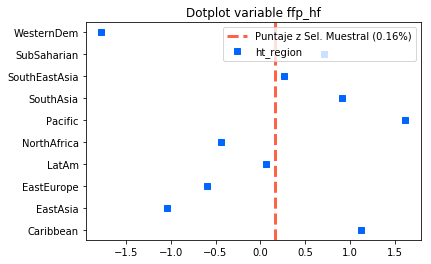

In [12]:
for variable in ['gle_cgdpc', 'undp_hdi', 'ffp_hf']:
    funciones_auxiliares.crear_dotplot(my_sorted_no_na_df, variable, 'ht_region', False, 'zscore')

## 5. Genere un método que devuelva un gráfico comparando dos curvas de densidad

<b>* El método debe contener los siguientes argumentos:
    * df1 : Tabla de datos 1.
    * df2 : Tabla de datos 2.
    * variable : Variable a contrastar.
    * log : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False .
* Grafique las curvas para imf_pop , gle_cgdpc y undp_hdi.
</b>

*************************************************************************


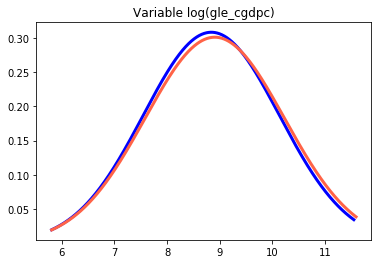

*************************************************************************


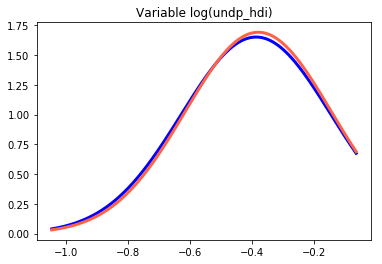

*************************************************************************


In [13]:
for variable in ['imf_pop', 'gle_cgdpc', 'undp_hdi']:
    funciones_auxiliares.generar_curvas_de_densidad(my_sorted_no_na_df, df, variable)
    funciones_auxiliares.generar_curvas_de_densidad(my_sorted_no_na_df, df, variable, True)
    print('*************************************************************************')

<b>¿En qué casos es necesario utilizar logaritmos? ¿Por qué?</b>

Observamos que las distribuciónes para las variables <b>gle_cgdpc</b> y <b>imf_pop</b> son altamente sesgada donde algunos valores se escapan de forma substancial de la muestra, por este motivo se puede corregir mediante la <b>distribución lognormal</b>. Para la variable <b>undp_hdi</b> no es necesario utilizar logaritmos ya que presenta una <b>distribución normal</b>.